<a href="https://colab.research.google.com/github/taru4u3/NeuralNetzwerk/blob/main/check_credit_staus_fullypaid_chargedoff_real_praxis_feature_engineering_heavy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Download first csv which contains column names with description

In [ ]:
data_info = pd.read_csv('./lending_club_info.csv',index_col='LoanStatNew')
#index_col : int or sequence, default 0
#defines which Column to use for index.

In [ ]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [ ]:
print(data_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


Define a function, that is handy to read description of any column

In [ ]:
def feature_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [ ]:
feature_info('grade')

LC assigned loan grade


Download second csv containing the column data

In [ ]:
df = pd.read_csv('./lending_club_loan_two.csv')

In [ ]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<Axes: xlabel='count', ylabel='loan_status'>

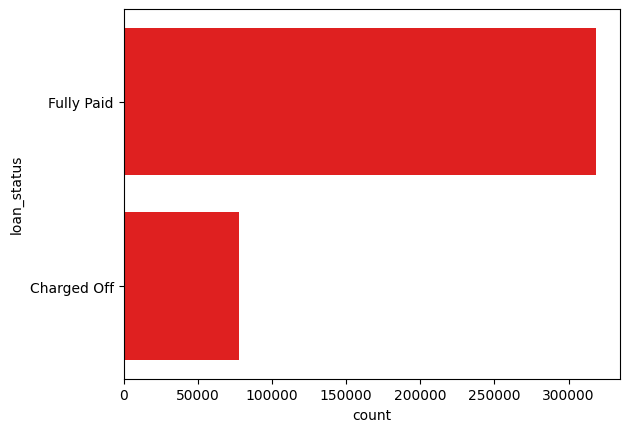

In [ ]:
sns.countplot(df['loan_status'], color='r')

Make loan_status as numeric feature so that we can use it to check its correlation with other features

In [ ]:
df['loan_repaid' ] = df['loan_status'].apply(lambda x : 0 if x=="Fully Paid" else 1)

In [ ]:
df['loan_repaid' ].value_counts()

0    318357
1     77673
Name: loan_repaid, dtype: int64

In [ ]:
df.corr()['loan_repaid'].sort_values(ascending=False)

<ipython-input-38-9939242440e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values(ascending=False)


loan_repaid             1.000000
int_rate                0.247758
revol_util              0.082373
dti                     0.062413
loan_amnt               0.059836
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
pub_rec_bankruptcies    0.009383
revol_bal              -0.010892
total_acc              -0.017893
annual_inc             -0.053432
mort_acc               -0.073111
Name: loan_repaid, dtype: float64

<ipython-input-46-2bd19d8c7e42>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])


<Axes: xlabel='loan_amnt', ylabel='Density'>

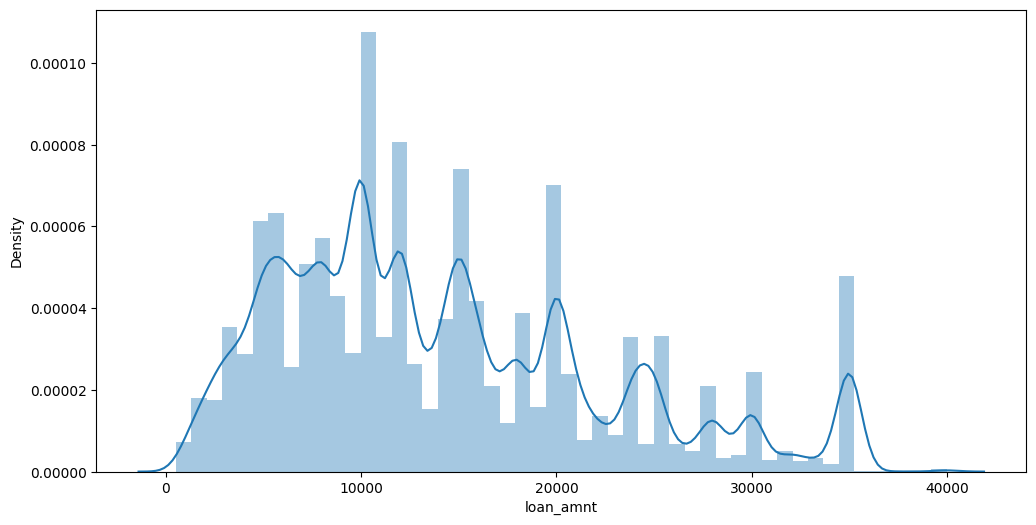

In [ ]:
# Next let us check how loan_amount is distributed
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'])

<Axes: xlabel='loan_amnt', ylabel='installment'>

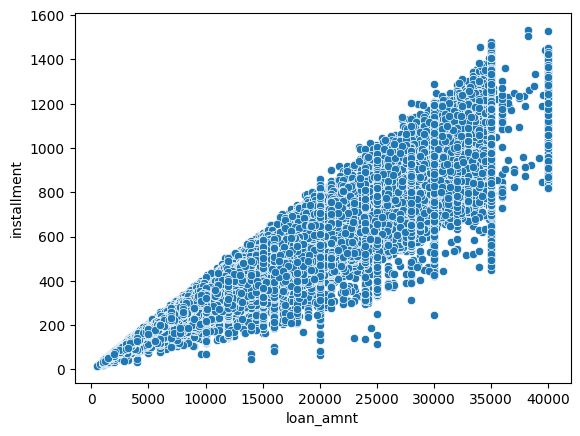

In [ ]:
# Next let us check if loan_amount increases do installments increases
sns.scatterplot(x='loan_amnt',y='installment',data=df)

<Axes: xlabel='loan_status', ylabel='int_rate'>

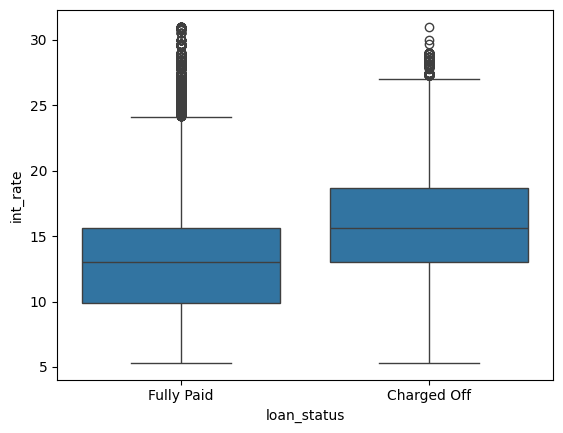

In [ ]:
# As we see interest rate is highly coorelated with loan status so lets see
sns.boxplot(x='loan_status',y='int_rate',data=df)
# indeed, interest_rate has an impact on loan_status, ppl with lower interest rate have paid compared to ppl with higher interest rate

In [ ]:
feature_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


<Axes: xlabel='loan_status', ylabel='revol_util'>

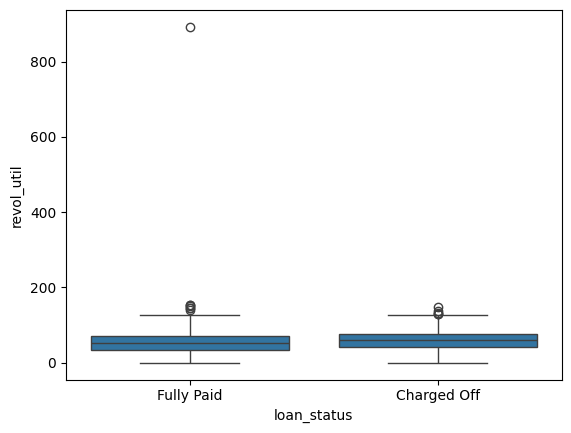

In [ ]:
# As we see second coorelated feature is revol_util
sns.boxplot(x='loan_status',y='revol_util',data=df)
# not significant

In [ ]:
print(feature_info('dti'))

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
None


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

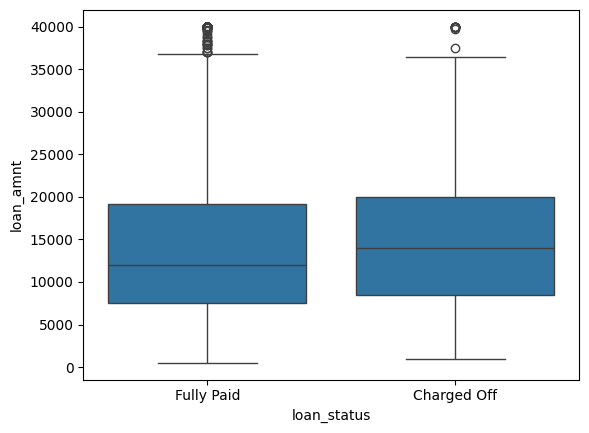

In [ ]:
# Let us see if loan_amnt plays a role in determining loan_status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
# doesnt look like loan was fullypaid if loan amount was low or high, it has no significant impact

<Axes: xlabel='loan_status', ylabel='mort_acc'>

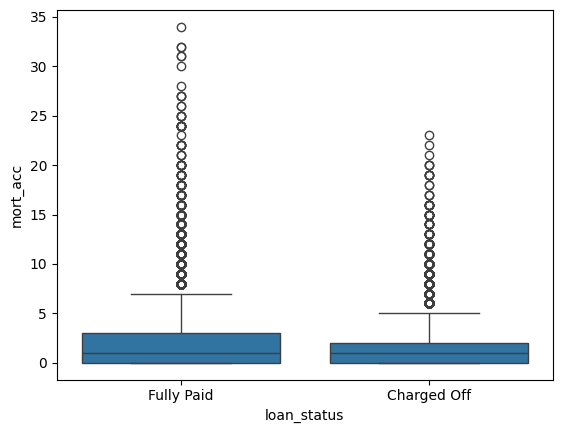

In [ ]:
sns.boxplot(x='loan_status',y='mort_acc',data=df)
# Looks like ppl with more mortgage accounts have paid off their loan relative to ppl with less mortgage accounts

Now let us focus on feature engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
# Let us dig into object data types

In [ ]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

Extract the numeric month so 36 and 60 but note there is a problem in this data there is empty space in the beginning hence extract not 2 but first 3 chars and convert them into int

In [ ]:
df['term'] = df['term'].apply(lambda s: int(s[:3]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<Axes: xlabel='grade', ylabel='count'>

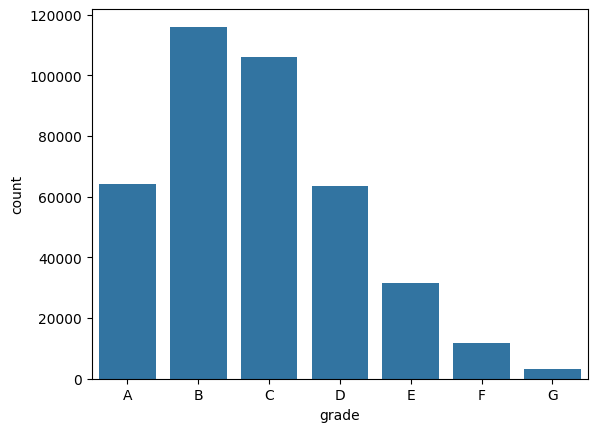

In [ ]:
sns.countplot(x=df['grade'].sort_values())

<Axes: xlabel='sub_grade', ylabel='count'>

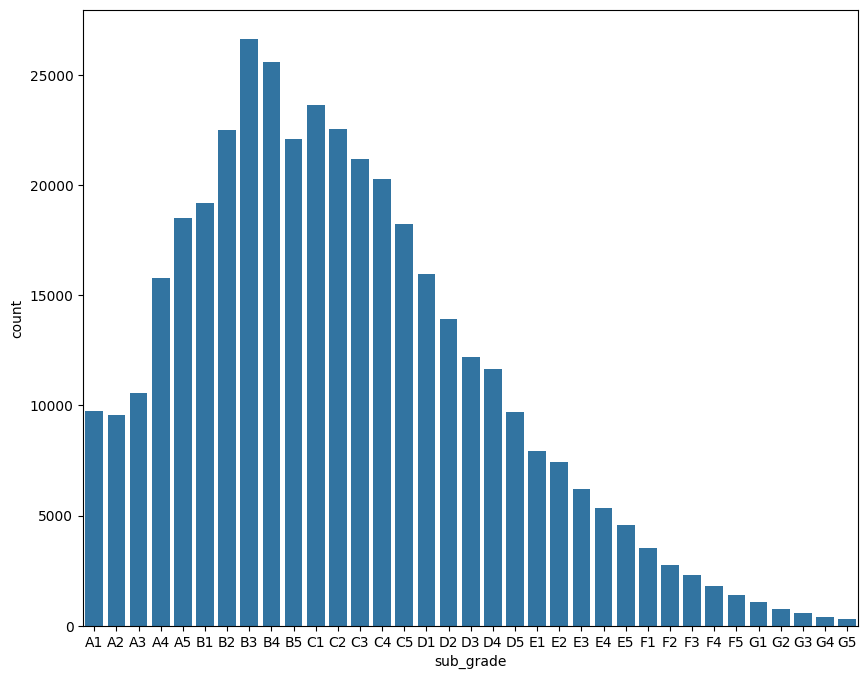

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(x=df['sub_grade'].sort_values())

Grade is incorporated in subgrade in great detail, so let us remove grade and convert subgrade using one hot encoding

In [ ]:
df.drop('grade',axis=1,inplace=True)

In [ ]:
# one hot encoding
sub_grade = pd.get_dummies(df['sub_grade' ], drop_first=True)

In [ ]:
df = pd.concat([df, sub_grade], axis=1)

In [ ]:
df.drop('sub_grade',axis=1,inplace=True)

KeyError: "['sub_grade'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 62 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_title             373103 non-null  object 
 5   emp_length            377729 non-null  object 
 6   home_ownership        396030 non-null  object 
 7   annual_inc            396030 non-null  float64
 8   verification_status   396030 non-null  object 
 9   issue_d               396030 non-null  object 
 10  loan_status           396030 non-null  object 
 11  purpose               396030 non-null  object 
 12  title                 394275 non-null  object 
 13  dti                   396030 non-null  float64
 14  earliest_cr_line      396030 non-null  object 
 15  

In [ ]:
# Deal with further object types and null values

In [ ]:
df['sub_grade']

In [ ]:
df['term_new']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term_new, Length: 396030, dtype: int64

In [ ]:
df['term'] = df['term'].apply(lambda x[0:1]: int(x))

SyntaxError: invalid syntax (<ipython-input-69-93f4d92b5385>, line 1)

In [ ]:
data_info.columns

Index(['Description'], dtype='object')